The following dataset provides  a series of variables that correspond to  the presence or abscence of certain deseases (categorical variables), or measures of physiological parameters for a sample of patients. The aim is to fit a model that predicts in the most accurate way if any patient would survive or not.

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn
import os

In [2]:
print(os.getcwd())
print(os.listdir())

C:\Users\Andres\Desktop\Datasets_CSV\heart_failure
['.ipynb_checkpoints', '.Rhistory', 'analysis.nb.html', 'analysis.Rmd', 'heart_failure_clinical_records_dataset.csv', 'Untitled.ipynb']


## Exploratory analysis 

In [3]:
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")
print("shape = {0}".format(data.shape))
data.head(5)

shape = (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
#Search for null values in all the dataframe

null_data = pd.DataFrame(data.isnull().sum(), columns = ["Null Values"])
null_data

,Null Values
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


<function matplotlib.pyplot.show(close=None, block=None)>

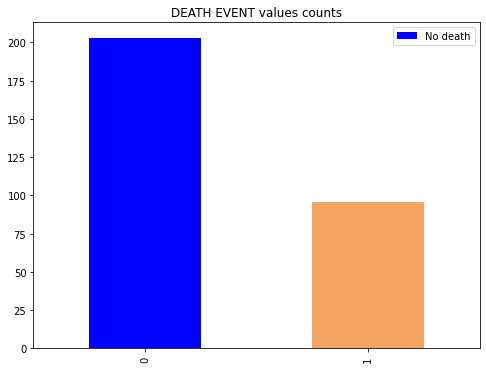

In [6]:
#Check the distribution of the target variable (DEATH EVENT)

plt.figure(figsize = (8,6))


data["DEATH_EVENT"].value_counts().plot(kind = "bar", color = ["b", "sandybrown"], label = 'No death')
plt.title("DEATH EVENT values counts")
plt.legend()
plt.show

In [7]:
#Split data

X = data.iloc[:,1:-1]
y = data["DEATH_EVENT"]

from sklearn.model_selection import train_test_split

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [8]:
#Implementig decision trees algorithm

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

def tree_model(x_train, x_test, y_train, y_test):
    print('{:^8} | {:^7} | {:^7} | {:^7} |'.format('MAX DEPTH', 'ACCURACY', 'F1', 'RECALL'))
    max_depths = range(1,5)
    for max_depth in max_depths:
        clf = DecisionTreeClassifier(max_depth = max_depth)
        clf.fit(x_train,y_train)
        y_pred = clf.predict(X_test)
        print("{:^9} | {:^8.3} | {:^7.3} |{:^8.3} |".format(max_depth, accuracy_score(y_test, y_pred),
                                                      f1_score(y_test, y_pred), recall_score(y_test, y_pred)))

tree_model(X_train, X_test, y_train, y_test)

MAX DEPTH | ACCURACY |   F1    | RECALL  |
    1     |  0.809   |  0.649  | 0.529   |
    2     |  0.809   |  0.697  | 0.657   |
    3     |  0.809   |  0.661  | 0.557   |
    4     |  0.775   |  0.657  | 0.643   |


In [9]:
#Implementing k nearest neighbors model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

def knn_model(x_train, x_test, y_train, y_test, max_n):
    parameters = {'metric':('manhattan','euclidean','cosine'),
             'n_neighbors': range(1,max_n)}

    knc = KNeighborsClassifier()
    knn = GridSearchCV(knc, param_grid = parameters, scoring = 'r2')
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print('Best params =', knn.best_params_, '\n\n')
    print(' {:^7} | {:^7} | {:^7} |'.format('ACCURACY', 'F1', 'RECALL'))
    print("{:^9.3} | {:^7.3} |{:^8.3} |".format(accuracy_score(y_test, y_pred),
                                                      f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
knn_model(X_train, X_test, y_train, y_test, 50)

Best params = {'metric': 'cosine', 'n_neighbors': 8} 


 ACCURACY |   F1    | RECALL  |
  0.722   |  0.341  | 0.214   |


In [10]:
#Testing logistic classifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit

def log_reg_cross_val():
    cv = ShuffleSplit(n_splits = 6,test_size = 0.3)
    lr = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000)
    accuracies = cross_val_score(lr, X, y, cv = cv, scoring = 'accuracy')
    print('Mean Accuracy = {:.3}'.format(np.mean(accuracies)))

Let's see if we can get a better result by balancing the data

### Balancing Data

###### Undersampling

<AxesSubplot:>

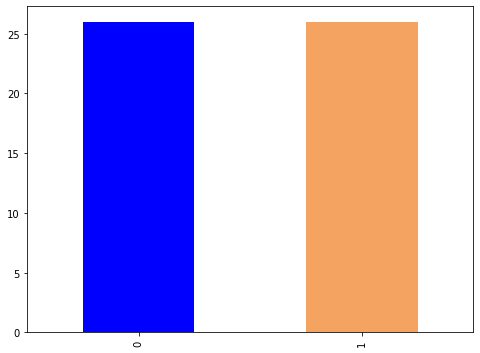

In [11]:

from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 1, replacement = True)
x_rus, y_rus = rus.fit_resample(X_train, y_train)

plt.figure(figsize = (8,6))
y_rus.value_counts().plot(kind = 'bar',  color = ["b", "sandybrown"])

In [12]:
tree_model(x_rus, X_test, y_rus, y_test)

MAX DEPTH | ACCURACY |   F1    | RECALL  |
    1     |  0.809   |  0.649  | 0.529   |
    2     |  0.818   |  0.716  | 0.686   |
    3     |  0.785   |  0.734  | 0.886   |
    4     |  0.785   |  0.702  | 0.757   |


In [13]:
knn_model(x_rus, X_test, y_rus, y_test, 20)

Best params = {'metric': 'cosine', 'n_neighbors': 14} 


 ACCURACY |   F1    | RECALL  |
  0.684   |  0.441  | 0.371   |


In [14]:
def log_tarin_test(x_train, x_test, y_train, y_test):
    lr = LogisticRegression(solver = 'lbfgs', multi_class = 'ovr', max_iter = 1000)
    lr.fit(x_train, y_train)
    y_pred = lr.predict(X_test)
    print(' {:^7} | {:^7} | {:^7} |'.format('ACCURACY', 'F1', 'RECALL'))
    print("{:^9.3} | {:^7.3} |{:^8.3} |".format(accuracy_score(y_test, y_pred),
                                                      f1_score(y_test, y_pred), recall_score(y_test, y_pred)))
log_tarin_test(x_rus, X_test, y_rus, y_test)

 ACCURACY |   F1    | RECALL  |
  0.737   |  0.654  | 0.743   |


###### Oversampling

<AxesSubplot:>

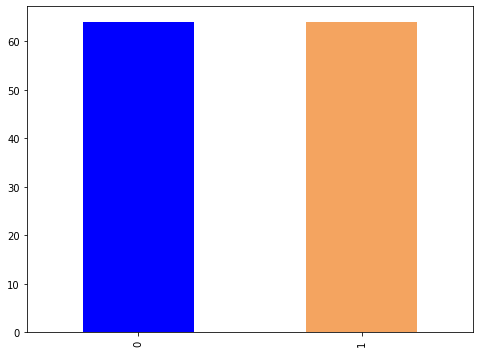

In [15]:
#Using imblearn SMOT modeule to oversample the minority class
from imblearn.over_sampling import SMOTE 

smote = SMOTE()

#balancing training data
x_smote, y_smote = smote.fit_resample(X_train, y_train)

plt.figure(figsize = (8,6))
y_smote.value_counts().plot(kind = 'bar',  color = ["b", "sandybrown"])

In [16]:
tree_model(x_smote, X_test, y_smote, y_test)

MAX DEPTH | ACCURACY |   F1    | RECALL  |
    1     |  0.833   |  0.711  | 0.614   |
    2     |  0.809   |  0.726  | 0.757   |
    3     |  0.799   |  0.708  | 0.729   |
    4     |  0.813   |  0.715  |  0.7    |


In [17]:
knn_model(x_smote, X_test, y_smote, y_test, 50)

Best params = {'metric': 'cosine', 'n_neighbors': 3} 


 ACCURACY |   F1    | RECALL  |
  0.67    |  0.566  | 0.643   |


In [18]:
log_tarin_test(x_smote, X_test, y_smote, y_test)

 ACCURACY |   F1    | RECALL  |
  0.818   |  0.736  | 0.757   |


The best accuracy score obtained correspond to that from the  oversampled training dataset, using the decision trees clasifier.